У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи pandas.DataFrame. Це дозволяє будувати візуалізації ще швидше.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot` та `pandas`.  Завантажте дані з файла yulu_rental.csv у pandas.DataFrame df.

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
df = pd.read_csv('../../data/yulu_rental.csv')

In [15]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


1.1. Користуючись групою методів `pandas.plot` побудуйте гістограму кількості зареєстрованих користувачів з налаштуваннями за замовченням (тобто без жодних додаткових параметрів).

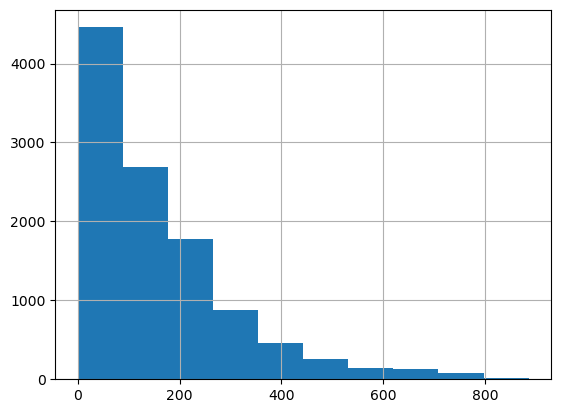

In [33]:
df.registered.hist();

1.2. Побудуйте гістограму для цього ж показника, але задайте кількість бінів рівну 30 і задайте прозорість 0.5. Додайте підписи за осями ОХ і ОУ, а також назву дівграмі. Опишіть свої спостереження. Що бачите? Чому дані можуть мати такий розподіл?

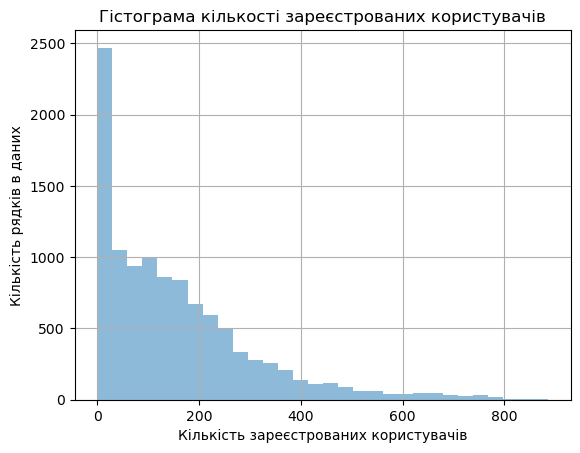

In [61]:
plt.hist(df.registered, bins=30, alpha=0.5)
plt.grid(axis='both')
plt.title('Гістограма кількості зареєстрованих користувачів')
plt.xlabel('Кількість зареєстрованих користувачів')
plt.ylabel('Кількість рядків в даних')
plt.show();

Має вийти щось таке (може бути без сітки):

![](https://drive.google.com/uc?export=view&id=1Pb3UD8cmg_V0LLf8A4feOepTDXMqEAf8)


Як показує гістограма кількість зареєстрованих користувачів більшою мірою зосереджене у першому біні, тобто менша кількість реєстрацій від 1 до 28 приблизно - найчастіше зустрічаються у майже 2500 рядках. Менше кількість зареєстрованих користувачів у один день чи одну годину зустрічається частіше, ніж коли б в один день зареєструвалось одразу 700 чи 800 користувачів. Ці дані можуть свідчити про нерівномірність активності користувачів (можливі пікові години та дні, коли реєструються більше, але таких днів менше).

--------

Перетворимо колонку `datetime` на тип даних `pd.datetime` - це нам доопоможе в подальшій роботі. Просто запустіть колонку нижче і занатуйте собі цей метод роботи з колонкою, в якій міститься дата і час.

In [64]:
df['datetime'] = pd.to_datetime(df.datetime)

І створимо нову колонку `dayofweek` для того, аби дослідити детальніше, коли у нас немає поїздок.

In [67]:
df['dayofweek'] = df.datetime.dt.day_of_week

Переглянемо значення в колонкці. Колонка dayofweek містить числа від 0 до 6 включно, де 0 відповідає понеділку.

In [85]:
df[['datetime','dayofweek']][df.dayofweek==0].head()

,datetime,dayofweek
47,2011-01-03 00:00:00,0
48,2011-01-03 01:00:00,0
49,2011-01-03 04:00:00,0
50,2011-01-03 05:00:00,0
51,2011-01-03 06:00:00,0


2. Проведемо аналіз нульової активності зареєстрованих користувачів за днями тижня. Для цього
  1. Виберіть з набору даних усі записи, де кількість зареєстрованих користувачів дорівнює 0. Групуйте ці записи за днями тижня (`dayofweek`) та обчисліть кількість нульових записів для кожного дня.
  2. Після групування, використайте графік типу "bar" для візуалізації результатів. Кожна смужка на графіку має відображати кількість записів у даних для цього дня тижня, коли не було зареєстровано жодної поїздки користувачами.

In [144]:
registered_zero = df[df.registered == 0]
registered_zero_by_day = registered_zero.groupby('dayofweek')['registered'].count()
registered_zero_by_day

dayofweek
0    5
1    3
2    2
3    1
4    1
5    1
6    2
Name: registered, dtype: int64

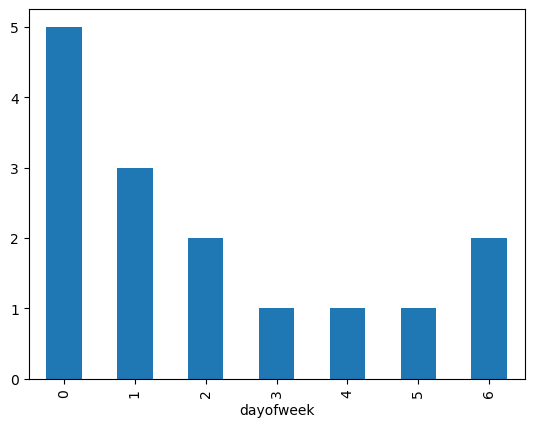

In [291]:
registered_zero_by_day.plot.bar()
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1FXNzMa7rTdBQDwXSQfPTtPX5CHZK9A4X)

3. Проведемо аналіз загальної кількості зареєстрованих покристувачів за різними погодними умовами.
Згрупуйте всі дані за погодними умовами і визначте суму кількості зареєстрованих користувачів для кожної погодньої умови.
Побудуйте стовпачасту діаграму, які відобразить результат обчислень.
Зверніться до опису даних та дайте відповідь: чи побудована візуалізація має логічний сенс з точки зору опису даних.

In [156]:
registered_by_weather = df.groupby('weather')['registered'].sum()
registered_by_weather

weather
1    1186163
2     419914
3      87106
4        158
Name: registered, dtype: int64

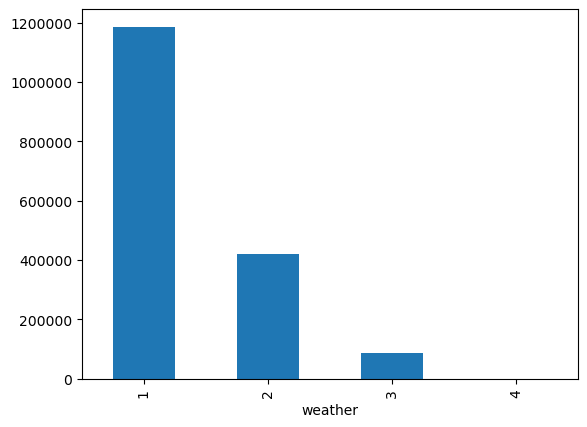

In [188]:
registered_by_weather.plot.bar()
plt.ticklabel_format(style='plain', axis='y')

plt.show();

Згідно з цифрами та даними графіку, можемо дійти висновку, що залежність від погодних умов є пряма. Чим сприятливіші погодні умови, тим більше користувачів реєструється або користується сервісом. Ця залежність може пояснюватися такими факторами як зручність використання. За гарної погоди люди мають більше вільного часу або можливостей для активності, включаючи реєстрацію на сервісах. За несприятливих умов (наприклад, дощу чи снігу), активність зменшується, адже користувачі можуть уникати зайвих дій, таких як реєстрація.

4. Користуючись групою методів pandas.plot побудуйте діаграму розсіювання (scatter plot) між вологістю і кількістю зареєстрованих користувачів. Встановіть прозорість на 0.5, а також налаштуйте діаграму так, аби колір кожної точки відповідав значенню температури за відчуттями (`atemp`).

Проаналізуйте графік, що спостерігаєте?

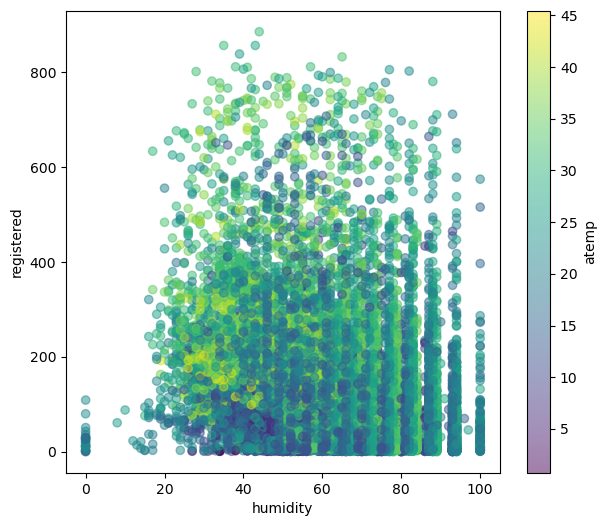

In [289]:
plt.figure(figsize=(7,6))
plt.scatter('humidity', 'registered', c=df.atemp, data=df, alpha=0.5)
plt.xlabel('humidity')
plt.ylabel('registered')
plt.colorbar().set_label('atemp');

Згідно з побудованим графіком бачимо, що розподіл точок щільний та рівномірно зосереджений у центрі. Середня кількість зареєстрованих користувачів буде коливатися в межах від 0 до 400, далі кількість користувачів сягає рекордної кількості реєстрації 800 за температури 25-35 градусів та за нижчої вологості 40-60%. Це може свідчити про те що в більш комфортні погодні умови за середньої вологості та невисоких температурних коливаннях користувачі здатні частіше здійснювати реєстрацію, адже так комфортніше користуватися сервісом. Екстремальні погодні умови (висока вологість або дуже низькі/високі температури) суттєво зменшують активність.

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1trepX8z23YwyP9P8cAko9IzwOZkvLo8y)